### Imagine you have a dataset where you have different features like Age , Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

In [14]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df=data.copy()

In [8]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [13]:
for i in df.columns:
    if df[i].dtype=="O":
        print(df[i].value_counts(),'\n')

Male      1068
Female    1043
Name: Gender, dtype: int64 

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64 

yes    1866
no      245
Name: FAVC, dtype: int64 

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

no     2067
yes      44
Name: SMOKE, dtype: int64 

no     2015
yes      96
Name: SCC, dtype: int64 

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64 



# The column Gender,family_history_with_overweight, FAVC,SMOKE,SCC have 2 types of value i.e, yes or no and Gender has Male or female. So for these we will be using nominal encoding. For other columns we will be Ordinal encoding. 

In [46]:
df[['family_history_with_overweight','FAVC','SMOKE','SCC']]=data[['family_history_with_overweight','FAVC','SMOKE','SCC']]

In [47]:
# Encoding for columns having yes and no values only also not using Label Encoder as it assumes Ordinal relationship 
for i in ['family_history_with_overweight','FAVC','SMOKE','SCC']:
    np.array(df[i]).reshape(-1,1)
    encoded_col=pd.DataFrame(df[i].map({'yes':1,'no':0}))
    df[i]=encoded_col

In [33]:
# Encoding the Gender column as we need to feed numerical data to our model
df['Gender']=data['Gender'].map({'Female' : 0,'Male' :1})

In [34]:
df['Gender']

0       0
1       0
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Gender, Length: 2111, dtype: int64

In [48]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [38]:
df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight    float64
FAVC                              float64
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                             float64
CH2O                              float64
SCC                               float64
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [36]:
# Ordinal encoding for the categorical variables different categories

from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()

In [40]:
for i in df.columns:
    if df[i].dtypes=='object':
        d= np.array(df[i]).reshape(-1,1)
        encoded_col= pd.DataFrame(encoder.fit_transform(d)).astype(int)
        df[i]=encoded_col
        

In [49]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [50]:
encoded_values={
    "Obesity_Type_I": 2,
    "Obesity_Type_III": 4,
    "Obesity_Type_II":3,
    "Overweight_Level_I":5,
    "Overweight_Level_II":6,
    "Normal_Weight":1,
    "Insufficient_Weight":0  
}

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=df.drop(columns=['NObeyesdad'])
y=df['NObeyesdad']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [52]:
x_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1503,0,18.024744,1.617192,83.121811,1,1,2.976509,3.0,2,0,1.022705,0,1.025690,0.313016,3,3
121,1,23.000000,1.870000,95.000000,1,1,1.000000,3.0,1,0,2.000000,0,0.000000,2.000000,1,3
1739,1,37.638102,1.750085,118.114184,1,1,2.073224,3.0,2,0,2.024035,0,0.131371,0.000000,2,0
395,0,20.000000,1.540000,39.000000,1,1,1.000000,3.0,2,0,2.000000,0,3.000000,2.000000,2,3
45,0,21.000000,1.530000,65.000000,1,0,2.000000,3.0,2,0,1.000000,0,0.000000,1.000000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,17.000000,1.750000,70.000000,1,0,2.000000,3.0,2,0,1.000000,0,3.000000,2.000000,2,4
1930,0,25.982113,1.627818,105.428628,1,1,3.000000,3.0,2,0,1.480750,0,0.098043,0.663492,2,3
79,1,23.000000,1.650000,60.000000,1,0,2.000000,3.0,2,0,2.000000,0,0.000000,0.000000,2,3
1859,0,25.943827,1.629491,104.839068,1,1,3.000000,3.0,2,0,2.209790,0,0.114698,0.604422,2,3


In [53]:
x_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
785,0,16.172992,1.603842,65.000000,1,1,2.543563,1.000000,2,0,2.000000,1,0.694281,1.056911,2,3
1838,0,20.989016,1.807340,155.872093,1,1,3.000000,3.000000,2,0,2.417122,0,0.952725,0.573958,2,3
2083,0,24.469756,1.663341,113.077187,1,1,3.000000,3.000000,2,0,2.632224,0,0.300964,0.269560,2,3
1105,1,22.675679,1.823765,96.945262,1,1,1.588782,2.601675,2,0,2.469469,0,1.736538,1.886855,2,3
361,0,40.000000,1.560000,80.000000,1,1,2.000000,1.000000,2,0,2.000000,0,2.000000,0.000000,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1,25.000000,1.700000,83.000000,0,1,3.000000,3.000000,2,0,3.000000,1,3.000000,0.000000,3,2
169,0,45.000000,1.630000,77.000000,1,1,2.000000,3.000000,1,0,1.000000,0,0.000000,0.000000,3,0
22,0,22.000000,1.650000,60.000000,1,1,3.000000,3.000000,2,0,2.000000,0,1.000000,0.000000,2,0
499,0,18.503343,1.683124,126.673780,1,1,3.000000,3.000000,2,0,1.115967,0,1.541072,1.000000,2,3


In [54]:
# Creating the object of Decision Tree Classifier and fitting the training data in our model
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
DTC.score(x_train,y_train)

1.0

In [56]:
# Seems like an overfitted model hence we need to do some tuning and pruning
DTC.score(x_test,y_test)

0.9211356466876972

In [57]:
ccp_values=DTC.cost_complexity_pruning_path(x_train,y_train)
ccp_values_df=pd.DataFrame(ccp_values)

In [58]:
ccp_values_df

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000447,0.001341
2,0.000650,0.005243
3,0.000654,0.006552
4,0.000658,0.007868
...,...,...
60,0.030262,0.429854
61,0.037617,0.467471
62,0.045292,0.512763
63,0.088189,0.600952


In [59]:
DTC_models=[]
for i in ccp_values_df['ccp_alphas']:
    dtc=DecisionTreeClassifier(ccp_alpha=i)
    DTC_models.append(dtc.fit(x_train,y_train))

In [60]:
train_score=[]
test_score=[]
for model in DTC_models:
    score=model.score(x_train,y_train)
    train_score.append(score)
    
for model in DTC_models:
    score=model.score(x_test,y_test)
    test_score.append(score)
    

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

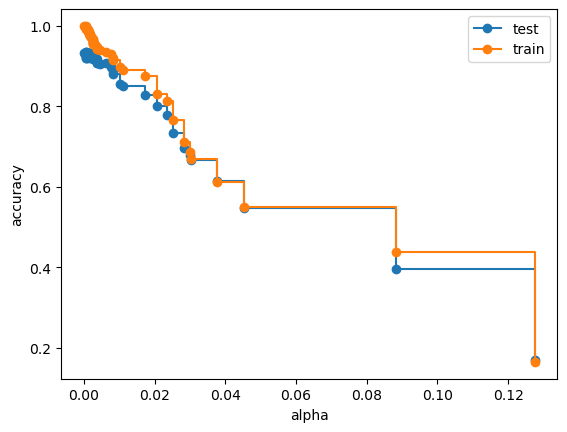

In [63]:
# Plotting to see where the train and test accuracy is close but not too low neither 100% which is not the case in reality
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_values_df['ccp_alphas'],test_score,marker='o',label="test",drawstyle="steps-post")
ax.plot(ccp_values_df['ccp_alphas'],train_score,marker='o',label="train",drawstyle="steps-post")
ax.legend()
plt.show()

In [64]:
grid_param={  
            "criterion":['gini','entropy'],
            "splitter":['best','random'],
            "max_depth":range(2,40,1),
            "min_samples_split":range(2,10,1),
            "min_samples_leaf":range(1,10,1),
            "ccp_alpha":[0.01,0.02]
}


In [65]:
# Hyperparameter tuning to find best parameters for our model

from sklearn.model_selection import GridSearchCV

grid_cv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=5,n_jobs=-1)

In [66]:
best_DTC=grid_cv.fit(x_train,y_train)

In [67]:
best_DTC.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [68]:
# Training with best possible parameters
best_model1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=5,
                               splitter='best',ccp_alpha=0.01)

# Training with best possible parameters
best_model2=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=5,
                               splitter='best',ccp_alpha=0.02)



In [69]:
best_model1.fit(x_train,y_train)
print(f"training accuracy for model1 {best_model1.score(x_train,y_train)}\n")
print(f"testing accuracy for model1 {best_model1.score(x_test,y_test)}")


training accuracy for model1 0.957345971563981

testing accuracy for model1 0.9242902208201893


[Text(0.5671875, 0.9285714285714286, 'x[3] <= 99.536\nentropy = 2.802\nsamples = 1477\nvalue = [187, 209, 244, 219, 225, 196, 197]\nclass = y[2]'),
 Text(0.271875, 0.7857142857142857, 'x[3] <= 61.319\nentropy = 2.341\nsamples = 955\nvalue = [187, 209, 166, 3, 0, 196, 194]\nclass = y[1]'),
 Text(0.1, 0.6428571428571429, 'x[2] <= 1.661\nentropy = 1.149\nsamples = 306\nvalue = [184, 112, 0, 0, 0, 9, 1]\nclass = y[0]'),
 Text(0.05, 0.5, 'x[3] <= 46.828\nentropy = 1.268\nsamples = 170\nvalue = [65, 95, 0, 0, 0, 9, 1]\nclass = y[1]'),
 Text(0.025, 0.35714285714285715, 'entropy = 0.478\nsamples = 68\nvalue = [61, 7, 0, 0, 0, 0, 0]\nclass = y[0]'),
 Text(0.075, 0.35714285714285715, 'x[2] <= 1.538\nentropy = 0.741\nsamples = 102\nvalue = [4, 88, 0, 0, 0, 9, 1]\nclass = y[1]'),
 Text(0.05, 0.21428571428571427, 'entropy = 1.273\nsamples = 15\nvalue = [0, 6, 0, 0, 0, 8, 1]\nclass = y[5]'),
 Text(0.1, 0.21428571428571427, 'entropy = 0.359\nsamples = 87\nvalue = [4, 82, 0, 0, 0, 1, 0]\nclass = y[1]'

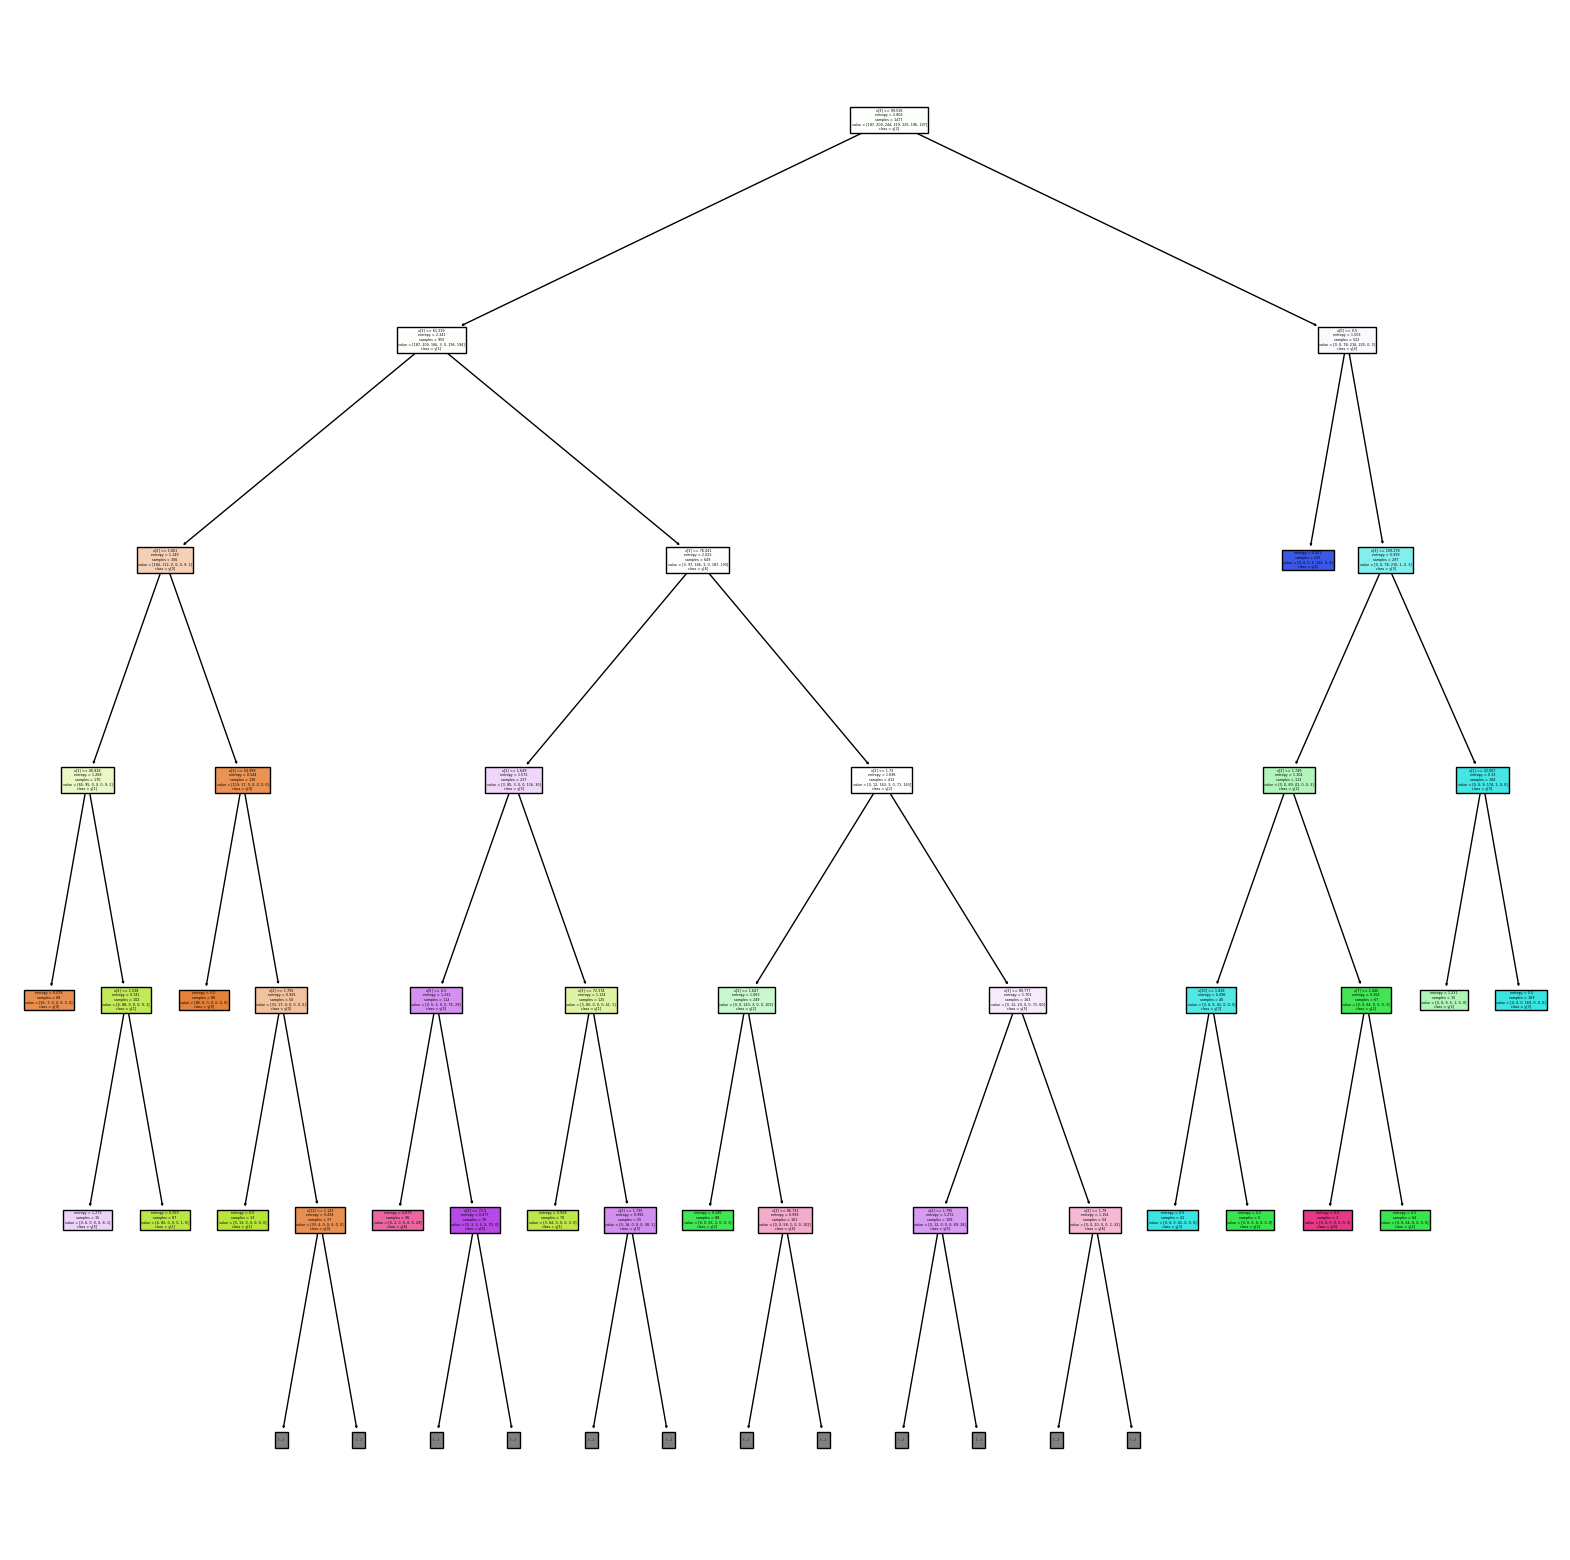

In [70]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(best_model1,filled=True,class_names=True,max_depth=5)
# Similary we can also see this splitting for model2 if we want